In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
from google.colab import files

ModuleNotFoundError: No module named 'google.colab'

In [5]:
uploaded = files.upload()

NameError: name 'files' is not defined

In [ ]:
uploaded1 = files.upload()

Saving appleStore_description.csv to appleStore_description (2).csv


In [ ]:
import io 
AppleStore = pd.read_csv(io.BytesIO(uploaded['AppleStore.csv']))
reviews = pd.read_csv(io.BytesIO(uploaded1['appleStore_description.csv']))


In [ ]:
AppleStore.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [ ]:
reviews.head()

,id,track_name,size_bytes,app_desc
0,281656475,PAC-MAN Premium,100788224,"SAVE 20%, now only $3.99 for a limited time!\n..."
1,281796108,Evernote - stay organized,158578688,Let Evernote change the way you organize your ...
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,Download the most popular free weather app pow...
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,The eBay app is the best way to find anything ...
4,282935706,Bible,92774400,On more than 250 million devices around the wo...


In [ ]:
AppleStore.shape


(7197, 17)

In [ ]:
reviews.shape

(7197, 4)

In [ ]:
Store = pd.merge(AppleStore, reviews, on='id')
Store.head()

,Unnamed: 0,id,track_name_x,size_bytes_x,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,track_name_y,size_bytes_y,app_desc
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,PAC-MAN Premium,100788224,"SAVE 20%, now only $3.99 for a limited time!\n..."
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,Evernote - stay organized,158578688,Let Evernote change the way you organize your ...
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,Download the most popular free weather app pow...
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,The eBay app is the best way to find anything ...
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1,Bible,92774400,On more than 250 million devices around the wo...


In [ ]:
Combine_AppleStore_df = Store.drop(columns=['track_name_y', 'size_bytes_y', 'rating_count_ver', 'user_rating_ver', 'vpp_lic', 'currency', 'cont_rating', 'ipadSc_urls.num'])
Combine_AppleStore_df.head()

,Unnamed: 0,id,track_name_x,size_bytes_x,price,rating_count_tot,user_rating,ver,prime_genre,sup_devices.num,lang.num,app_desc
0,1,281656475,PAC-MAN Premium,100788224,3.99,21292,4.0,6.3.5,Games,38,10,"SAVE 20%, now only $3.99 for a limited time!\n..."
1,2,281796108,Evernote - stay organized,158578688,0.00,161065,4.0,8.2.2,Productivity,37,23,Let Evernote change the way you organize your ...
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,0.00,188583,3.5,5.0.0,Weather,37,3,Download the most popular free weather app pow...
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,0.00,262241,4.0,5.10.0,Shopping,37,9,The eBay app is the best way to find anything ...
4,5,282935706,Bible,92774400,0.00,985920,4.5,7.5.1,Reference,37,45,On more than 250 million devices around the wo...


In [ ]:
Combine_AppleStore_df = Combine_AppleStore_df.rename(columns = {'id': 'ID','track_name_x': 'TRACK NAME', 'size_bytes_x':'SIZE',
                                    'rating_count_tot':'TOTAL COUNT RATING', 'user_rating':'RATING', 'ver':'VERSION', 'prime_genre': 'GENRE',  
                                    'sup_devices.num':'DEVICE SUPPORTED', 'lang.num':'LANGUAGE SUPPORTED', 'app_desc':'DESCRIPTION','price': 'PRICE'})

In [ ]:
Combine_AppleStore_df.head()

,Unnamed: 0,ID,TRACK NAME,SIZE,PRICE,TOTAL COUNT RATING,RATING,VERSION,GENRE,DEVICE SUPPORTED,LANGUAGE SUPPORTED,DESCRIPTION
0,1,281656475,PAC-MAN Premium,100788224,3.99,21292,4.0,6.3.5,Games,38,10,"SAVE 20%, now only $3.99 for a limited time!\n..."
1,2,281796108,Evernote - stay organized,158578688,0.00,161065,4.0,8.2.2,Productivity,37,23,Let Evernote change the way you organize your ...
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,0.00,188583,3.5,5.0.0,Weather,37,3,Download the most popular free weather app pow...
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,0.00,262241,4.0,5.10.0,Shopping,37,9,The eBay app is the best way to find anything ...
4,5,282935706,Bible,92774400,0.00,985920,4.5,7.5.1,Reference,37,45,On more than 250 million devices around the wo...


In [ ]:
Combine_AppleStore_df.shape

(7197, 12)

In [ ]:
Combine_AppleStore_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7197 entries, 0 to 7196
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          7197 non-null   int64  
 1   ID                  7197 non-null   int64  
 2   TRACK NAME          7197 non-null   object 
 3   SIZE                7197 non-null   int64  
 4   PRICE               7197 non-null   float64
 5   TOTAL COUNT RATING  7197 non-null   int64  
 6   RATING              7197 non-null   float64
 7   VERSION             7197 non-null   object 
 8   GENRE               7197 non-null   object 
 9   DEVICE SUPPORTED    7197 non-null   int64  
 10  LANGUAGE SUPPORTED  7197 non-null   int64  
 11  DESCRIPTION         7197 non-null   object 
dtypes: float64(2), int64(6), object(4)
memory usage: 730.9+ KB


In [ ]:
Combine_AppleStore_df.drop_duplicates

<bound method DataFrame.drop_duplicates of       Unnamed: 0  ...                                        DESCRIPTION
0              1  ...  SAVE 20%, now only $3.99 for a limited time!\n...
1              2  ...  Let Evernote change the way you organize your ...
2              3  ...  Download the most popular free weather app pow...
3              4  ...  The eBay app is the best way to find anything ...
4              5  ...  On more than 250 million devices around the wo...
...          ...  ...                                                ...
7192       11081  ...  Place the falling blocks correctly in order to...
7193       11082  ...  A thrilling virtual reality roller coaster exp...
7194       11087  ...  Rock star Bret Michaels, winner of Celebrity A...
7195       11089  ...  VR Roller Coaster World is an app for Google C...
7196       11097  ...  5 previous escape games plus 1 new game in one...

[7197 rows x 12 columns]>

In [ ]:
AppleStore_sorted_ranking=Combine_AppleStore_df.sort_values('TOTAL COUNT RATING', ascending=False)
AppleStore_sorted_ranking[[ 'TRACK NAME', 'TOTAL COUNT RATING', 'SIZE', 'PRICE','GENRE' ]].head(20)

,TRACK NAME,TOTAL COUNT RATING,SIZE,PRICE,GENRE
16,Facebook,2974676,389879808,0.00,Social Networking
519,Instagram,2161558,113954816,0.00,Photo & Video
1346,Clash of Clans,2130805,116476928,0.00,Games
707,Temple Run,1724546,65921024,0.00,Games
7,Pandora - Music & Radio,1126879,130242560,0.00,Music
755,Pinterest,1061624,74778624,0.00,Social Networking
4,Bible,985920,92774400,0.00,Reference
1493,Candy Crush Saga,961794,222846976,0.00,Games
178,Spotify Music,878563,132510720,0.00,Music
275,Angry Birds,824451,175966208,0.00,Games


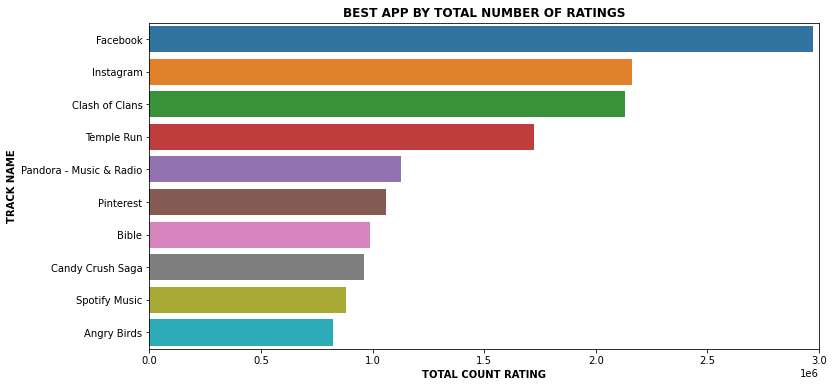

In [ ]:
Ratings = AppleStore_sorted_ranking.sort_values('TOTAL COUNT RATING', ascending=False)
plt.figure(figsize=(12,6))
axis1=sns.barplot(x=Ratings['TOTAL COUNT RATING'].head(10), y=Ratings['TRACK NAME'].head(10), data=Ratings)
plt.xlim(0, 3000000)
plt.title('BEST APP BY TOTAL NUMBER OF RATINGS', weight='bold')
plt.xlabel('TOTAL COUNT RATING', weight='bold')
plt.ylabel('TRACK NAME', weight='bold')
plt.savefig('best_app.png')

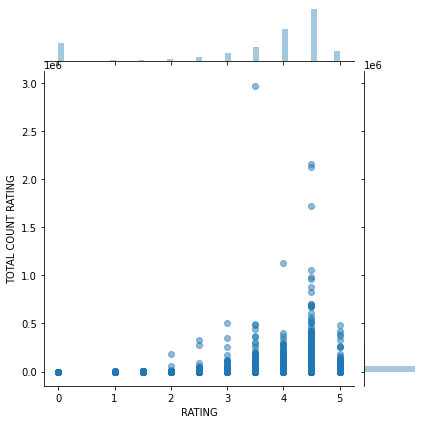

In [ ]:

sns.jointplot(x='RATING',y='TOTAL COUNT RATING',data=Combine_AppleStore_df,alpha=0.5)

RECOMMENDING

In [ ]:
apps = Combine_AppleStore_df.pivot_table(index='ID',columns='TRACK NAME',values='TOTAL COUNT RATING')
apps.head()

TRACK NAME,! OH Fantastic Free Kick + Kick Wall Challenge,"""Burn your fat with me!!""","""HOOK""","""klocki""",( OFFTIME ) light – Track how much you use your phone & Digital Detox and unplug to focus,*Solitaire*,-The 穴通し3D- 君の記憶力x反射神経を問う! ～Mr.CURVEからの挑戦状 ～,. Calculator .,1 Second Everyday: Video Diary,1+2=3,1-Bit Rogue: A dungeon crawler RPG!,10 Pin Shuffle Pro Bowling,10 – 頭を良くするパズル,100 Balls,100 PICS Coloring - free color in book game app,100 PICS Quiz - guess the picture trivia games,100! Block Puzzle - Color jigsaw 10x10 board game,1000m Zombie Escape!,1010!,12 Minute Athlete HIIT Workouts,12 Steps AA Companion - Alcoholics Anonymous,12オーディンズ - 王道RPG,1600,1号店-全球超市 轻松到家,2-bit Cowboy Rides Again,20 Minutes.fr - l'actualité en continu,20/20 Diet For Your Life,2016 U.S. Open Golf Championship,2016 U.S. Open Golf Championship for iPad,2016 US Open Tennis Championships,2048,21 Days Metabolic Diet,25 Days of Christmas: Holiday Advent Calendar 2016,270toWin,"2Face Fitpack - Dein Trainingsprogramm mit persönlichem Ernährungsplan, Kalorienrechner und Trainingsplan",2XL Snocross,2XL Supercross,2XL Supercross HD,2代目 Nソウル みそぽん,30秒マン-これクリアできるやついる？-,...,青藍高校リア充部,非诚勿扰-中国最大免费婚恋交友平台,面倒だがトリあえずキーボード ～ さわりたくなるキーボード,面白ニュースを超快適に読める!!まとめのまとめMM,頭の回転をはやくする！脳トレ！Blackhole,风行视频+ HD - 电影电视剧体育视频播放器,飛べないロボはただの... ～無料アクションRPGゲーム～,飞凡--智慧新生活,飞刀传奇-动作武侠热血江湖即时PK传奇（登录爆金装）,飞常准Pro-全球航班查询机票酒店预订,飞猪,食べないと死ぬ 3,食べないと死ぬ2,饿了么外卖-大牌美食，折扣热卖,香哈菜谱-最专业的家常菜谱大全 无广告版,驴妈妈旅游-订景点门票机票火车票特价酒店,驾校一点通-保过版，2017最新驾考学车宝典,驾考宝典-2017最新考驾照驾校学车驾考通,高德地图HD,高德地图（精准专业的手机地图）,高清影视-大片免费天天看,鬼とび,鬼吹灯昆仑神宫 - 年兽袭来,鬼畜-一亿人都在用的聊天必备神器!,鬼畜三国-红将觉醒,魔女の泉,魔灵觉醒（王者归来）- 3D新职业魔剑士降临,魔窟-无尽的地下城,鳥として生きた男 その壮絶な人生,鴨川等間隔の法則,麻雀物語３ 役満乱舞の究極大戦,黄金日-贵金属理财投资黄金白银,龙之觉醒-热血经典RPG，回味激燃岁月,龙珠直播-高清游戏娱乐直播平台,실시간 날씨,애드픽 - 인플루언서가 되어 의미있는 수익을 올리세요!,２ちゃんねる for iPhone,ＣＲスーパー海物語ＩＮ沖縄４,Ｘ:15秒の人気 アクション ゲーム,ｗｗｗ
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
281656475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
281796108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
281940292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
282614216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
282935706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
AppleStore_sorted_ranking.sort_values('TOTAL COUNT RATING',ascending=False).head(10)

,Unnamed: 0,ID,TRACK NAME,SIZE,PRICE,TOTAL COUNT RATING,RATING,VERSION,GENRE,DEVICE SUPPORTED,LANGUAGE SUPPORTED,DESCRIPTION
16,17,284882215,Facebook,389879808,0.0,2974676,3.5,95.0,Social Networking,37,29,Keeping up with friends is faster than ever. \...
519,591,389801252,Instagram,113954816,0.0,2161558,4.5,10.23,Photo & Video,37,29,Instagram is a simple way to capture and share...
1346,1561,529479190,Clash of Clans,116476928,0.0,2130805,4.5,9.24.12,Games,38,18,Join millions of players worldwide as you buil...
707,810,420009108,Temple Run,65921024,0.0,1724546,4.5,1.6.2,Games,40,1,"""In pretty much every treasure hunting adventu..."
7,8,284035177,Pandora - Music & Radio,130242560,0.0,1126879,4.0,8.4.1,Music,37,1,Find the music you love and let the music you ...
755,863,429047995,Pinterest,74778624,0.0,1061624,4.5,6.26,Social Networking,37,27,Pinterest is the world’s catalog of ideas. Fin...
4,5,282935706,Bible,92774400,0.0,985920,4.5,7.5.1,Reference,37,45,On more than 250 million devices around the wo...
1493,1731,553834731,Candy Crush Saga,222846976,0.0,961794,4.5,1.101.0,Games,43,24,"Candy Crush Saga, from the makers of Candy Cru..."
178,202,324684580,Spotify Music,132510720,0.0,878563,4.5,8.4.3,Music,37,18,Spotify is the best way to listen to music on ...
275,310,343200656,Angry Birds,175966208,0.0,824451,4.5,7.4.0,Games,38,10,Use the unique powers of the Angry Birds to de...
